In [2]:
import tensorflow as tf

# Load the model
cnn = tf.keras.models.load_model('weights.h5')

# Display the summary to get layer names
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 128)         204928    
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,875,530
Trainable params: 2,875,530
Non-

In [3]:
# Load the model
fcn = tf.keras.models.load_model('final_fcn_weights.h5')

# Display the summary to get layer names
fcn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 locally_connected2d (Locall  (None, 14, 14, 64)       953344    
 yConnected2D)                                                   
                                                                 
 locally_connected2d_1 (Loca  (None, 5, 5, 128)        5123200   
 llyConnected2D)                                                 
                                                                 
 locally_connected2d_2 (Loca  (None, 3, 3, 256)        2656512   
 llyConnected2D)                                                 
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                        

In [41]:
import numpy as np
import matplotlib.pyplot as plt

conv2d_layer = cnn.get_layer('conv2d_1')
conv2d_weights = conv2d_layer.get_weights()
local2d_layer = fcn.get_layer('locally_connected2d_1')
local2d_weights = local2d_layer.get_weights()
print(conv2d_weights[0].shape)
print(local2d_weights[0].shape)
vectors_list = conv2d_weights[0].reshape((1600,128))
vectors_list = np.transpose(vectors_list)
matrices_list = np.transpose(local2d_weights[0], axes=(2,0,1))

#fig, axs = plt.subplots(8, 8, figsize=(16, 16), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
#axs = axs.flatten()

#for i in range(64):
    #vector = vectors_list[i]
    #matrix = matrices_list[i]


     #Calculate Euclidean distances
    #distances = np.linalg.norm(matrix - vector, axis=1)

    # Create a histogram for each subplot
    #axs[i].hist(distances, bins=20, edgecolor='black')
    #axs[i].set_title(f'Pair {i+1}')

# Adjust layout and show the plot
#plt.tight_layout()
#plt.show()

(5, 5, 64, 128)
(25, 1600, 128)


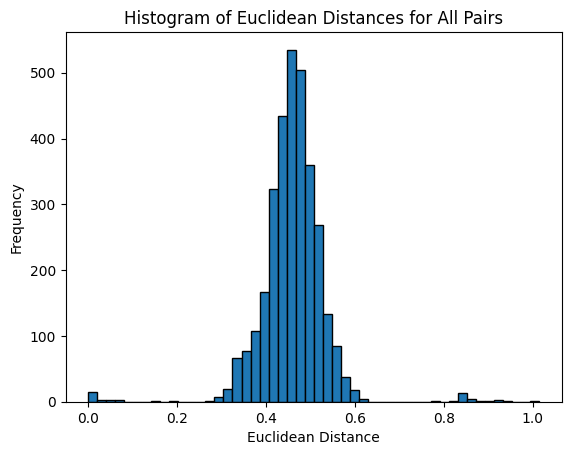

In [42]:
all_distances = np.concatenate([np.linalg.norm(matrix - vector, axis=1)/np.linalg.norm(vector) for vector, matrix in zip(vectors_list, matrices_list)])

# Create a histogram
plt.hist(all_distances, bins=50, edgecolor='black')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Euclidean Distances for All Pairs')
plt.show()